![image.png](attachment:image.png)

##### **Good luck with taking your exam. Keep working and make your dreams all come true. Seeing the results of all of your hard work will make this struggle worth it. We’re all thinking of you.** 
<b><font color='blue'>AI-PRO Spark Team ITI</font></b>

## Objective:
- The objective from this project is to create a <b>Logistic Regression Classifier</b> to predict the <b>Stroke Condition</b>.
- <b>Stoke</b> is a condition in which either the blood flow to the brain stops or blood flow is excessive.
- It is required to obtain <b>ROC > 0.65</b>.

### Data:
- Data is provided in csv format in a file named <b>healthcare-dataset-stroke-data.csv</b>

### Column names and data types are as follow:
- id, integer.
- gender, string.
- age, double.
- hypertension, integer.
- heart_disease, integer.
- ever_married, string.
- work_type, string.
- Residence_type, string.
- avg_glucose_level, double.
- bmi, double.
- smoking_status, string.
- stroke, integer <b>(Target Label)</b>.
If the person has stroke the stroke label value is <b>"1"</b> otherwise <b>"0"</b>.

## To perform this task follow the following guiding steps:

In [165]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.1/spark-3.0.1-bin-hadoop3.2.tgz
!tar xf spark-3.0.1-bin-hadoop3.2.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.1-bin-hadoop3.2"
import findspark
findspark.init()

### Create a spark session and import the required libraries

In [166]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

### Create a data schema programatically

In [205]:
import pyspark.sql.types as typ

sch = typ.StructType([
      typ.StructField('id', typ.IntegerType(), True)
    , typ.StructField('gender', typ.StringType(), True)
    , typ.StructField('age', typ.DoubleType(), True)
    , typ.StructField('hypertension', typ.IntegerType(), True)
    , typ.StructField('heart_disease', typ.IntegerType(), True)
    , typ.StructField('ever_married', typ.StringType(), True)
    , typ.StructField('work_type', typ.StringType(), True)
    , typ.StructField('Residence_type', typ.StringType(), True)
    , typ.StructField('avg_glucose_level', typ.DoubleType(), True)
    , typ.StructField('bmi', typ.DoubleType(), True)
    ,typ.StructField('smoking_status', typ.StringType(), True)
    ,typ.StructField('stroke', typ.IntegerType(), True)
    ])

### Read the data using the standard DataReader (Key,Value) pairs format
- Provide the schema and any other required options.

In [206]:
df= spark.read.csv('healthcare-dataset-stroke-data.csv',header=True, schema= sch )

### Explore the data 
#### You have to do the following:
- Print the Schema.
- Show the first 10 rows from the data.
- Explore null values and show how many null values in each column.
- Plot a count plot for the target label and <b>notice the graph</b>.
- Perform any additional EDA you find useful.

In [207]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: string (nullable = true)
 |-- stroke: integer (nullable = true)



In [208]:
df.show(10)

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
| 9046|  Male|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|
|51676|Female|61.0|           0|            0|         Yes|Self-employed|         Rural|           202.21|null|   never smoked|     1|
|31112|  Male|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|
|60182|Female|49.0|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|     1|
| 1665|Female|79.0|           1|            0|         

In [209]:
from pyspark.sql.functions import isnan, when, count, col

With_Null_df=df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns])
With_Null_df.show()

+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
| id|gender|age|hypertension|heart_disease|ever_married|work_type|Residence_type|avg_glucose_level|bmi|smoking_status|stroke|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
|  0|     0|  0|           0|            0|           0|        0|             0|                0|201|             0|     0|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+



In [210]:
label_counts= df.select('stroke').groupby('stroke').count().show()

+------+-----+
|stroke|count|
+------+-----+
|     1|  249|
|     0| 4861|
+------+-----+



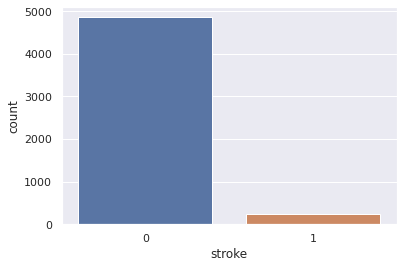

In [211]:
import seaborn as sns
sns.countplot(x='stroke',data=df.toPandas())

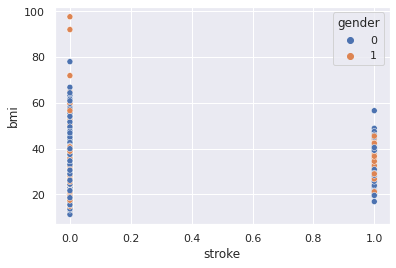

In [377]:
sns.scatterplot(x='stroke', y='bmi', hue= 'gender',data=df.toPandas() )

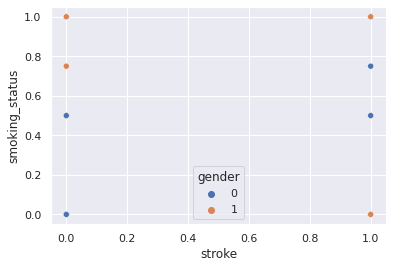

In [378]:
sns.scatterplot(x='stroke', y='smoking_status', hue= 'gender',data=df.toPandas() )

### Get the summary statistics of the age column
- You will find the minimum age is about <b>0.08</b>.
- Remove rows for the age below <b>2 years old</b>.

In [212]:
df.select('age').describe().show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|              5110|
|   mean|43.226614481409015|
| stddev| 22.61264672311348|
|    min|              0.08|
|    max|              82.0|
+-------+------------------+



In [213]:
df= df.where('age>=2')

In [236]:
df.select('age').describe().show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|              4990|
|   mean| 44.23907815631262|
| stddev|21.908077881917443|
|    min|               2.0|
|    max|              82.0|
+-------+------------------+



### Working with gender & smoking_status columns:
- Select and show the gender & smoking_status columns
- Get the distinct values for each column.

In [215]:
df.select('gender','smoking_status').show()

+------+---------------+
|gender| smoking_status|
+------+---------------+
|  Male|formerly smoked|
|Female|   never smoked|
|  Male|   never smoked|
|Female|         smokes|
|Female|   never smoked|
|  Male|formerly smoked|
|  Male|   never smoked|
|Female|   never smoked|
|Female|        Unknown|
|Female|        Unknown|
|Female|   never smoked|
|Female|         smokes|
|Female|         smokes|
|  Male|        Unknown|
|Female|   never smoked|
|Female|   never smoked|
|  Male|         smokes|
|  Male|         smokes|
|Female|   never smoked|
|  Male|        Unknown|
+------+---------------+
only showing top 20 rows



In [216]:
df.select('gender','smoking_status').distinct().show()

+------+---------------+
|gender| smoking_status|
+------+---------------+
|  Male|         smokes|
|  Male|formerly smoked|
| Other|formerly smoked|
|Female|        Unknown|
|  Male|        Unknown|
|Female|formerly smoked|
|  Male|   never smoked|
|Female|         smokes|
|Female|   never smoked|
+------+---------------+



In [217]:
df.select('gender').distinct().show()

+------+
|gender|
+------+
|Female|
| Other|
|  Male|
+------+



In [218]:
df.select('smoking_status').distinct().show()

+---------------+
| smoking_status|
+---------------+
|         smokes|
|        Unknown|
|   never smoked|
|formerly smoked|
+---------------+



#### Change the string values of the columns into numerical values as follow:
1. Gender column:
    * Male = 1 
    * Female = 0 
    * Other = 0 
2. Smoking Status column:
  * never smoked = 0
  * Unknown = 0.5
  * formerly smoked = 0.75
  * smokes = 1.0


In [219]:
gender_map= {'Male':1 , 'Female':0 , 'Other':0}


In [220]:
from pyspark.sql.functions import udf
from pyspark.sql.types import *

def genderMap(gender):
    return gender_map[gender]
genderMap_udf=udf(lambda gender:genderMap(gender))

In [221]:
import pyspark.sql.functions as F
df=df.withColumn("gender", genderMap_udf(F.col("gender")).cast('int')) 
df.show(10)

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
| 9046|     1|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|
|51676|     0|61.0|           0|            0|         Yes|Self-employed|         Rural|           202.21|null|   never smoked|     1|
|31112|     1|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|
|60182|     0|49.0|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|     1|
| 1665|     0|79.0|           1|            0|         

In [222]:
smoking_map= {'never smoked' : 0, 'Unknown' :0.5, 'formerly smoked' : 0.75,'smokes' : 1.0}

In [223]:
def smokeMap(person):
    return smoking_map[person]
smokeMap_udf=udf(lambda person:smokeMap(person))

In [224]:
df=df.withColumn("smoking_status", smokeMap_udf(F.col("smoking_status")).cast('float'))
df.show(10)

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+--------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi|smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+--------------+------+
| 9046|     1|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|          0.75|     1|
|51676|     0|61.0|           0|            0|         Yes|Self-employed|         Rural|           202.21|null|           0.0|     1|
|31112|     1|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|           0.0|     1|
|60182|     0|49.0|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|           1.0|     1|
| 1665|     0|79.0|           1|            0|         Yes|Sel

#### Show the output DataFrame
- Select and show the gender & smoking_status columns after value changing.
- Print schema for the new dataframe.

In [225]:
df.select('gender','smoking_status').show()

+------+--------------+
|gender|smoking_status|
+------+--------------+
|     1|          0.75|
|     0|           0.0|
|     1|           0.0|
|     0|           1.0|
|     0|           0.0|
|     1|          0.75|
|     1|           0.0|
|     0|           0.0|
|     0|           0.5|
|     0|           0.5|
|     0|           0.0|
|     0|           1.0|
|     0|           1.0|
|     1|           0.5|
|     0|           0.0|
|     0|           0.0|
|     1|           1.0|
|     1|           1.0|
|     0|           0.0|
|     1|           0.5|
+------+--------------+
only showing top 20 rows



In [226]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: float (nullable = true)
 |-- stroke: integer (nullable = true)



### Deal with null value according to your data analysis.

In [227]:
bmi_age= round(df.select(F.mean(df['bmi'])).collect()[0][0],0)
bmi_age

29.0

In [228]:
df= df.na.fill({'bmi':bmi_age})
df.show(10)

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+--------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi|smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+--------------+------+
| 9046|     1|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|          0.75|     1|
|51676|     0|61.0|           0|            0|         Yes|Self-employed|         Rural|           202.21|29.0|           0.0|     1|
|31112|     1|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|           0.0|     1|
|60182|     0|49.0|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|           1.0|     1|
| 1665|     0|79.0|           1|            0|         Yes|Sel

In [229]:
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
| id|gender|age|hypertension|heart_disease|ever_married|work_type|Residence_type|avg_glucose_level|bmi|smoking_status|stroke|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
|  0|     0|  0|           0|            0|           0|        0|             0|                0|  0|             0|     0|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+



### Split the data into training and test dataframes:
- 80% training and 20% test.
- seed = 42.
- Save each dataframe as a parquet file

In [230]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression

In [231]:
X_train, X_test = df.randomSplit([0.8,0.2],seed=42)
print(f"There are {X_train.count()} rows in the training set, and {X_test.count()} in the test set.")

There are 4037 rows in the training set, and 953 in the test set.


In [233]:
X_train.write.parquet("X_train_2.parquet")

In [234]:
X_test.write.parquet("X_test_2.parquet")

### Read the saved Train and Test DataFrame:
- Use the dataframes you read in the subsequent steps.

In [235]:
X_train= spark.read.parquet("X_train_2.parquet")
X_test= spark.read.parquet("X_test_2.parquet")

### Create the model:
- Perform feature engineering steps.
- Create the logistic regression classifier.
- Build the pipeline model that uses all feature engineering steps and the model.
- Train the pipeline model using the trainig dataset.

In [237]:
X_train.dtypes

[('id', 'int'),
 ('gender', 'int'),
 ('age', 'double'),
 ('hypertension', 'int'),
 ('heart_disease', 'int'),
 ('ever_married', 'string'),
 ('work_type', 'string'),
 ('Residence_type', 'string'),
 ('avg_glucose_level', 'double'),
 ('bmi', 'double'),
 ('smoking_status', 'float'),
 ('stroke', 'int')]

In [238]:
categoricalColumns = [col for (col, dtype) in X_train.dtypes
                   if (dtype == "string")]
categoricalColumns  

['ever_married', 'work_type', 'Residence_type']

In [344]:
numericColumns = [field for (field,dataType) in X_train.dtypes
              if ((dataType!='string') and (field!='id') and (field!='stroke'))]
numericColumns

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [345]:
indexOutputColumns = [x + "_Index" for x in categoricalColumns]
indexOutputColumns

['ever_married_Index', 'work_type_Index', 'Residence_type_Index']

In [346]:
oheOutputColumns = [x + "_OHE" for x in categoricalColumns]
oheOutputColumns

['ever_married_OHE', 'work_type_OHE', 'Residence_type_OHE']

In [347]:
stringIndexer = StringIndexer(inputCols=categoricalColumns,
                             outputCols=indexOutputColumns,
                             handleInvalid='skip')
oheEncoder = OneHotEncoder(inputCols=indexOutputColumns,
                          outputCols=oheOutputColumns)

In [348]:
assemblerInputs = oheOutputColumns + numericColumns
assemblerInputs

['ever_married_OHE',
 'work_type_OHE',
 'Residence_type_OHE',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [349]:
from pyspark.ml.feature import VectorAssembler

vecAssembler = VectorAssembler(inputCols=assemblerInputs,outputCol='features')

In [350]:
lr_model= LogisticRegression(featuresCol='features', labelCol='stroke', predictionCol='prediction')
pipeline =Pipeline(stages = [stringIndexer,oheEncoder,vecAssembler,lr_model])

In [351]:
pipelineModel = pipeline.fit(X_train)

### Perform predictions on tests dataframe:
- Test the model using the test dataframe
- Select and show the feature column.
- Print the schema of the output dataframe.
- Select and show both prediction and label columns.
- Explore the results for the label column stroke=1. i.e. select both columns (prediction,stroke) for stroke=1.<b>notice the result.</b> 
- Count the predicted 1 and 0 values.<b>notice the result.</b>   

In [352]:
predDF = pipelineModel.transform(X_test)

In [353]:
predDF.select('features','stroke','prediction').show()

+--------------------+------+----------+
|            features|stroke|prediction|
+--------------------+------+----------+
|(13,[0,1,5,6,7,10...|     0|       0.0|
|(13,[1,5,7,10,11]...|     0|       0.0|
|(13,[0,1,7,10,11]...|     0|       0.0|
|(13,[0,1,7,10,11,...|     0|       0.0|
|(13,[0,1,5,6,7,10...|     0|       0.0|
|(13,[0,1,7,10,11]...|     0|       0.0|
|(13,[0,2,6,7,8,10...|     0|       0.0|
|(13,[0,2,5,7,10,1...|     1|       0.0|
|(13,[4,7,10,11,12...|     0|       0.0|
|(13,[0,1,6,7,10,1...|     0|       0.0|
|(13,[0,3,6,7,10,1...|     0|       0.0|
|(13,[1,7,8,9,10,1...|     1|       0.0|
|(13,[1,6,7,10,11]...|     0|       0.0|
|(13,[0,2,7,10,11,...|     0|       0.0|
|(13,[0,1,7,8,10,1...|     0|       0.0|
|(13,[0,3,5,7,10,1...|     0|       0.0|
|(13,[1,5,7,10,11]...|     0|       0.0|
|[1.0,1.0,0.0,0.0,...|     0|       0.0|
|[1.0,0.0,0.0,1.0,...|     0|       0.0|
|(13,[1,5,7,10,11]...|     0|       0.0|
+--------------------+------+----------+
only showing top

In [354]:
#predDF = predDF.withColumn("prediction", F.col("prediction").cast('int'))

In [355]:
predDF.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: float (nullable = true)
 |-- stroke: integer (nullable = true)
 |-- ever_married_Index: double (nullable = false)
 |-- work_type_Index: double (nullable = false)
 |-- Residence_type_Index: double (nullable = false)
 |-- ever_married_OHE: vector (nullable = true)
 |-- work_type_OHE: vector (nullable = true)
 |-- Residence_type_OHE: vector (nullable = true)
 |-- features: vector (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)



In [356]:
predDF.select('stroke','prediction').where('stroke = 1').show()

+------+----------+
|stroke|prediction|
+------+----------+
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
+------+----------+
only showing top 20 rows



In [357]:
predDF.groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|       0.0|  953|
+----------+-----+



### Evaluate the model performance
- Use <b>BinaryClassificationEvaluator</b>. This will calculate the <b>ROC</b>.
- Set the parameters as follow:
    - <b>rawPredictionCol='prediction'</b> and <b>labelCol='stroke'</b>

In [358]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [359]:
evaluatorROC = BinaryClassificationEvaluator(rawPredictionCol='prediction'
                                             ,labelCol='stroke')

In [360]:
evaluatorROC.evaluate(predDF)

0.5

### Improve Model Performance
- You may noticed that <b>the target label is imbalanced</b>.
- LogisticRegression classifier has a special parameter <b>weightCol</b> to deal with imbalanced class.
- In order to use this parameter you must have a <b>weightCol</b> in your training dataframe.
- In order to create this column you will need to define a <b>UDF</b> and apply it to the target label column.
- Create a LogisticRegression classifier with <b>weightCol</b> parameter.
- Build and train a pipeline model with the new LogisticRegression.
- Perform the prediction on the test dataframe. 
- Select and show both prediction and label columns.
- Explore the results for the label column stroke=1. i.e. select both columns (prediction,stroke) for stroke=1.<b>notice the result.</b> 
- Count the predicted 1 and 0 values.<b>notice the result.</b>   
- Evaluate the model performance exactly as in the previous step.
### YOU SHOULD OBTAIN  ROC > 0.65
<BR>
<b><font color='red'>Note: feel free to deal with the imbalanced cluster with the above method or another. However, you can only use methods applied on SPARK DATAFRAME</font></b>

In [363]:
numNegatives= X_train.where('stroke =0').count()
numNegatives

3835

In [364]:
dataset_size = X_train.count()
dataset_size

4037

In [365]:

BalancingRatio= numNegatives/dataset_size
print('BalancingRatio = {}'.format(BalancingRatio))

BalancingRatio = 0.9499628436958137


In [366]:
X_train=X_train.withColumn("classWeights", when(X_train.stroke == 1,BalancingRatio).otherwise(1-BalancingRatio))

In [367]:
X_train.select("classWeights").show(5)

+-------------------+
|       classWeights|
+-------------------+
|0.05003715630418626|
|0.05003715630418626|
|0.05003715630418626|
|0.05003715630418626|
|0.05003715630418626|
+-------------------+
only showing top 5 rows



In [368]:
lr_model_balanced= LogisticRegression(featuresCol='features', labelCol='stroke', predictionCol='prediction',weightCol="classWeights")
pipeline =Pipeline(stages = [stringIndexer,oheEncoder,vecAssembler,lr_model_balanced])

In [369]:
pipelineModel = pipeline.fit(X_train)

In [370]:
predDF = pipelineModel.transform(X_test)

In [373]:
predDF.select('features','stroke','prediction').show()

+--------------------+------+----------+
|            features|stroke|prediction|
+--------------------+------+----------+
|(13,[0,1,5,6,7,10...|     0|       0.0|
|(13,[1,5,7,10,11]...|     0|       0.0|
|(13,[0,1,7,10,11]...|     0|       0.0|
|(13,[0,1,7,10,11,...|     0|       0.0|
|(13,[0,1,5,6,7,10...|     0|       1.0|
|(13,[0,1,7,10,11]...|     0|       0.0|
|(13,[0,2,6,7,8,10...|     0|       1.0|
|(13,[0,2,5,7,10,1...|     1|       1.0|
|(13,[4,7,10,11,12...|     0|       0.0|
|(13,[0,1,6,7,10,1...|     0|       1.0|
|(13,[0,3,6,7,10,1...|     0|       0.0|
|(13,[1,7,8,9,10,1...|     1|       1.0|
|(13,[1,6,7,10,11]...|     0|       0.0|
|(13,[0,2,7,10,11,...|     0|       1.0|
|(13,[0,1,7,8,10,1...|     0|       1.0|
|(13,[0,3,5,7,10,1...|     0|       1.0|
|(13,[1,5,7,10,11]...|     0|       0.0|
|[1.0,1.0,0.0,0.0,...|     0|       1.0|
|[1.0,0.0,0.0,1.0,...|     0|       1.0|
|(13,[1,5,7,10,11]...|     0|       0.0|
+--------------------+------+----------+
only showing top

In [374]:
predDF.select('stroke','prediction').where('stroke = 1').show()

+------+----------+
|stroke|prediction|
+------+----------+
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       0.0|
|     1|       1.0|
|     1|       1.0|
|     1|       0.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
+------+----------+
only showing top 20 rows



In [375]:
predDF.groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|       0.0|  666|
|       1.0|  287|
+----------+-----+



In [371]:
evaluatorROC = BinaryClassificationEvaluator(rawPredictionCol='prediction'
                                             ,labelCol='stroke')

In [372]:
evaluatorROC.evaluate(predDF)

0.7757777671252577

# GOOD LUCK
<b><font color='GREEN'>AI-PRO Spark Team ITI</font></b>

![image-3.png](attachment:image-3.png)